# Lecture 04 - Applications of Numpy

## Image manipulation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
face = misc.face(gray=True)
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

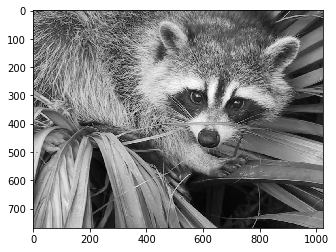

In [4]:
plt.imshow(face, cmap=plt.cm.gray)

Modify this image, e.g. convert it to a black and white image, put a black frame, change the contrast, ...

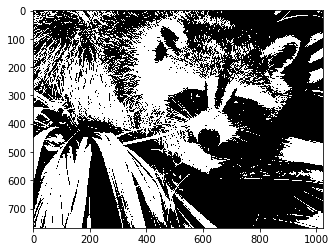

In [5]:
plt.imshow(face > 128, cmap=plt.cm.gray)

In [ ]:
framedface = np.zeros_like(face)
framedface[30:-31, 30:-31] = face[30:-31, 30:-31]
plt.imshow(framedface, cmap=plt.cm.gray)

In [ ]:
plt.imshow(255*(face/255)**1.5, cmap=plt.cm.gray)

In [ ]:
sy, sx = face.shape
y, x = np.ogrid[:sy, :sx]
centerx, centery = 660, 300
mask = ((y - centery)**2 + (x - centerx)**2) > 230**2
face[mask] = 0
plt.imshow(face, cmap=plt.cm.gray)

## Polynomials

In [1]:
from numpy.polynomial import polynomial as P

Powers increase from left to right (index corresponds to power)

In [2]:
p1 = P.Polynomial([1, 2])

In [3]:
p1.degree()

1

In [4]:
p1.roots()

array([-0.5])

In [5]:
p4 = P.Polynomial([24, -50, 35, -10, 1])

In [6]:
p4.degree()

4

In [7]:
p4.roots()

array([1., 2., 3., 4.])

In [8]:
p4.deriv()

Polynomial([-50.,  70., -30.,   4.], domain=[-1.,  1.], window=[-1.,  1.])

In [9]:
p4.integ()

Polynomial([  0.        ,  24.        , -25.        ,  11.66666667,
        -2.5       ,   0.2       ], domain=[-1.,  1.], window=[-1.,  1.])

In [12]:
P.polydiv(p4.coef, p1.coef)

(array([-35.0625,  20.125 ,  -5.25  ,   0.5   ]), array([59.0625]))

In [16]:
import numpy as np
import matplotlib.pyplot as plt

## Application: polynomial fit

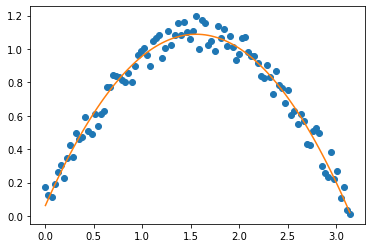

In [17]:
x = np.linspace(0, np.pi, 100)
y = np.sin(x)+0.2*np.random.rand(100)
plt.plot(x, y, 'o')
fit = P.Polynomial(P.polyfit(x, y, 2))
plt.plot(x, fit(x))

## Linear Algebra in NumPy

In [18]:
import numpy.linalg as LA
import scipy.linalg as la


In [19]:
a = np.arange(4).reshape(2, 2)
print(a)
eigenvalues, eigenvectors = LA.eig(a)
eigenvalues

[[0 1]
 [2 3]]


array([-0.56155281,  3.56155281])

In [20]:
eigenvectors

array([[-0.87192821, -0.27032301],
       [ 0.48963374, -0.96276969]])

Explore whether the eigenvectors are the rows or the columns.

In [21]:
a @ eigenvectors[:, 0]

array([ 0.48963374, -0.2749552 ])

In [22]:
eigenvalues[0]*eigenvectors[:, 0]

array([ 0.48963374, -0.2749552 ])

In [23]:
np.random.rand(4,3) @ np.random.rand(3,2)

array([[0.95733398, 0.83073589],
       [0.77325166, 0.63763026],
       [0.5168878 , 0.5400932 ],
       [0.58438924, 0.36656075]])

In [24]:
A = np.ones((4,3))
B = np.ones((3,5))

In [25]:
np.matmul(A, B)

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In [26]:
A @ B

array([[3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3.]])

In [27]:
M = np.array([[3,4],[-1,5]])
print(M)

[[ 3  4]
 [-1  5]]


In [28]:
M @ M @ M@ M

array([[-231,  832],
       [-208,  185]])

In [29]:
LA.matrix_power(M,4)

array([[-231,  832],
       [-208,  185]])

In [30]:
print(M.T)

[[ 3 -1]
 [ 4  5]]


In [31]:
M@M.T

array([[25, 17],
       [17, 26]])

In [32]:
LA.inv(M)


array([[ 0.26315789, -0.21052632],
       [ 0.05263158,  0.15789474]])

## Statistics with Numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
## Generate a 5 by 2 matrix whose elements are random numbers 0 to 1 
# Run multiple times
np.random.rand(5, 2)

array([[0.94026044, 0.06641902],
       [0.35892154, 0.03179192],
       [0.37532313, 0.39767105],
       [0.79624213, 0.62856296],
       [0.81226968, 0.33237493]])

In [35]:
## Generate a 5 by 2 matrix whose elements are random numbers 0 to 1 
## Use a random seed and run multiple times
np.random.seed(1234)
np.random.rand(5, 2)

array([[0.19151945, 0.62210877],
       [0.43772774, 0.78535858],
       [0.77997581, 0.27259261],
       [0.27646426, 0.80187218],
       [0.95813935, 0.87593263]])

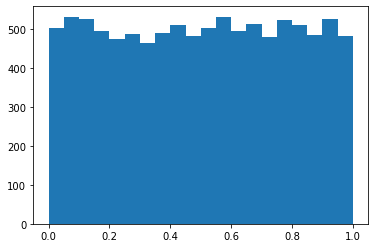

In [36]:
## Plot a histogram of 10000 random numbers between 0 and 1
plt.hist(np.random.rand(10000),bins=20)
plt.show()

(array([2076., 1940., 1972., 2011., 2045., 1953., 1980., 2038., 1936.,
        2049.]),
 array([1.00018026, 1.4001608 , 1.80014134, 2.20012188, 2.60010241,
        3.00008295, 3.40006349, 3.80004403, 4.20002457, 4.60000511,
        4.99998565]),
 <a list of 10 Patch objects>)

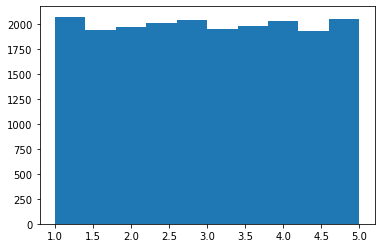

In [37]:
## Generate a 20 by 10000 matrix from random numbers between 0 and 1
## Then, plot a histogram of the distribution of random numberrs
x = np.random.uniform(1, 5, (20,1000))
plt.hist(np.ravel(x))

In [38]:
## Generate a 5 by 2 matrix whose elements are Gaussian random numbers 0 to 1 
# Run multiple times
np.random.randn(5,2)

array([[-1.56436454, -0.32120738],
       [ 1.223463  ,  0.19378088],
       [ 2.09259488,  0.09036976],
       [ 1.79682959,  0.58915888],
       [-0.33368904,  0.07142717]])

In [39]:
## Generate a 5 by 2 matrix whose elements are Gaussian random numbers 0 to 1 
## Use a random seed and run multiple times
np.random.seed(2020)
np.random.randn(5,2)

array([[-1.76884571,  0.07555227],
       [-1.1306297 , -0.65143017],
       [-0.89311563, -1.27410098],
       [-0.06115443,  0.06451384],
       [ 0.41011295, -0.57288249]])

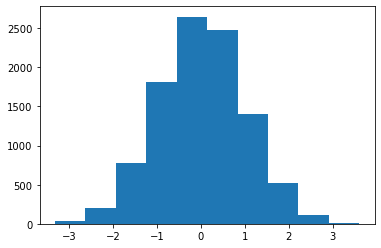

In [40]:
## Plot a histogram of 10000 Gaussian random number
plt.hist(np.random.randn(10000))
plt.show()

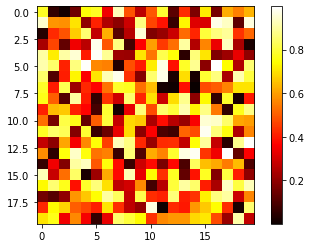

In [41]:
data = np.random.rand(20, 20)
plt.imshow(data, cmap=plt.cm.hot, interpolation='none')
plt.colorbar()

(array([[14., 20., 15., 20., 14., 17.],
        [18., 18., 16., 18., 12., 18.],
        [14., 15., 15., 17., 22., 17.]]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 3 Lists of Patches objects>)

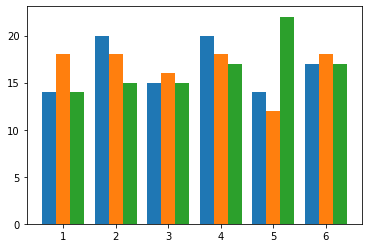

In [42]:
## Generate a 100 by 3 matrix with random intergers from 1 to 6
casts = np.random.randint(1, 7, (100, 3))
plt.hist(casts, np.linspace(0.5, 6.5, 7))

In [43]:
height = np.round(np.random.normal(1.75, 0.2, 20),2)
weight = np.round(np.random.normal(68.32, 15, 20),2)


In [44]:
np_height_weight_col = np.column_stack((height, weight))
print(np_height_weight_col)

[[ 1.59 72.34]
 [ 1.7  68.74]
 [ 1.78 72.76]
 [ 1.15 72.76]
 [ 1.61 79.75]
 [ 1.83 55.86]
 [ 1.65 75.31]
 [ 1.44 54.4 ]
 [ 1.45 77.39]
 [ 1.99 62.66]
 [ 1.73 60.58]
 [ 1.75 71.45]
 [ 1.89 83.61]
 [ 1.56 69.61]
 [ 1.46 79.93]
 [ 1.67 37.39]
 [ 1.6  81.57]
 [ 1.79 86.98]
 [ 1.5  77.55]
 [ 1.87 89.34]]


In [45]:
np_height_weight_row = np.row_stack((height, weight))
print(np_height_weight_row)

[[ 1.59  1.7   1.78  1.15  1.61  1.83  1.65  1.44  1.45  1.99  1.73  1.75
   1.89  1.56  1.46  1.67  1.6   1.79  1.5   1.87]
 [72.34 68.74 72.76 72.76 79.75 55.86 75.31 54.4  77.39 62.66 60.58 71.45
  83.61 69.61 79.93 37.39 81.57 86.98 77.55 89.34]]


In [46]:
np.concatenate((height, weight))

array([ 1.59,  1.7 ,  1.78,  1.15,  1.61,  1.83,  1.65,  1.44,  1.45,
        1.99,  1.73,  1.75,  1.89,  1.56,  1.46,  1.67,  1.6 ,  1.79,
        1.5 ,  1.87, 72.34, 68.74, 72.76, 72.76, 79.75, 55.86, 75.31,
       54.4 , 77.39, 62.66, 60.58, 71.45, 83.61, 69.61, 79.93, 37.39,
       81.57, 86.98, 77.55, 89.34])

In [47]:
np.vstack((height, weight))

array([[ 1.59,  1.7 ,  1.78,  1.15,  1.61,  1.83,  1.65,  1.44,  1.45,
         1.99,  1.73,  1.75,  1.89,  1.56,  1.46,  1.67,  1.6 ,  1.79,
         1.5 ,  1.87],
       [72.34, 68.74, 72.76, 72.76, 79.75, 55.86, 75.31, 54.4 , 77.39,
        62.66, 60.58, 71.45, 83.61, 69.61, 79.93, 37.39, 81.57, 86.98,
        77.55, 89.34]])

In [48]:
np.hstack((height, weight))

array([ 1.59,  1.7 ,  1.78,  1.15,  1.61,  1.83,  1.65,  1.44,  1.45,
        1.99,  1.73,  1.75,  1.89,  1.56,  1.46,  1.67,  1.6 ,  1.79,
        1.5 ,  1.87, 72.34, 68.74, 72.76, 72.76, 79.75, 55.86, 75.31,
       54.4 , 77.39, 62.66, 60.58, 71.45, 83.61, 69.61, 79.93, 37.39,
       81.57, 86.98, 77.55, 89.34])

In [49]:
x = np.random.choice([3, 5, 7, 9], p=[0.1, 0.2, 0.3, 0.4], size=(1000))

(array([ 97.,   0.,   0., 216.,   0.,   0., 289.,   0.,   0., 398.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

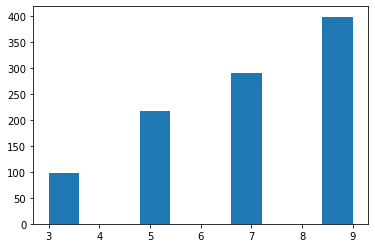

In [50]:
plt.hist(x,bins=10)

In [51]:
x = np.random.choice([3, 5, 7, 9], size=(3, 5))
print(x)

[[5 3 9 7 3]
 [7 9 9 9 5]
 [3 9 5 5 9]]


In [52]:
## Compare random.shuffle() versus random.permutation()

In [53]:
arr1 = np.array([1, 2, 3, 4, 5])
np.random.shuffle(arr1)
#print(arr1, arr2)
print(arr1)

[3 5 2 1 4]


In [57]:
arr2 = np.array([6, 7, 8, 9, 10])
np.random.permutation(arr2)
print(arr2)

[ 6  7  8  9 10]


In [58]:
arr3 = np.random.permutation(arr2)
print(arr3)

[ 9  8  7  6 10]


In [59]:
## Bernouli trials

In [60]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0


    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()

        # If less than p, it's a success so add one to n_success
        if random_number<p:
            n_success +=1

    return n_success

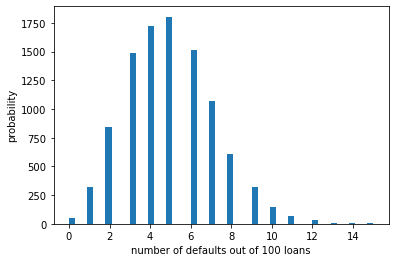

In [61]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(10000)

# Compute the number of defaults
for i in range(10000):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)


# Plot the histogram with default number of bins; label your axes
#_ = plt.hist(n_defaults, normed=True)
_ = plt.hist(n_defaults,bins=50)

_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()


In [62]:
## Binomial distribution

In [63]:
n_defaults = np.random.binomial(100,0.05,10000)
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 2) - 0.5
print(bins)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5]


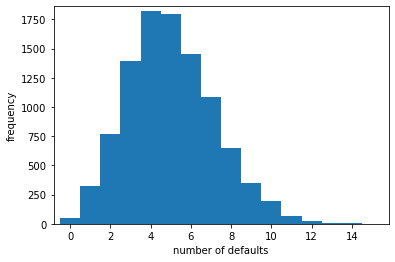

In [64]:
n_defaults = np.random.binomial(100,0.05,10000)
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 2) - 0.5

# Generate histogram
plt.hist(n_defaults,bins=bins)

# Set margins
plt.margins(0.02)

# Label axes
plt.xlabel('number of defaults')
plt.ylabel('frequency')

# Show the plot
plt.show()


In [65]:
## Poisson Distribution

In [66]:
## Relationship between binomial and Poisson

# Draw 10,000 samples out of Poisson distribution: samples_poisson
samples_poisson = np.random.poisson(10,10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

Poisson:      9.9715 3.158462877730242


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.400e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 9.300e+01, 0.000e+00, 0.000e+00, 0.000e+00, 1.990e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 3.930e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 6.200e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        8.960e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.095e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.236e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 1.267e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.139e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.750e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 7.470e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        5.000e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.460e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 2.170e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        5.400e+01, 0.000e+00, 0.000e+0

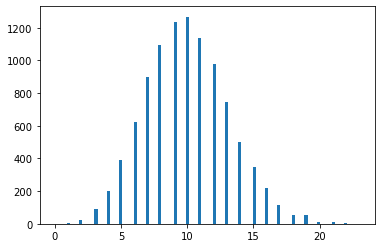

In [67]:
plt.hist(samples_poisson,100)

In [68]:
# Specify values of n and p to consider for Binomial: n, p
n = [10,50,500]
p = [0.5, 0.1, 0.01]

[5 6 5 ... 6 1 5]
n = 10 Binom: 5.0131 1.5753502435966422
[5 4 3 ... 7 4 9]
n = 50 Binom: 5.0071 2.138609265387205
[5 6 6 ... 5 6 2]
n = 500 Binom: 5.0101 2.2116957272644897


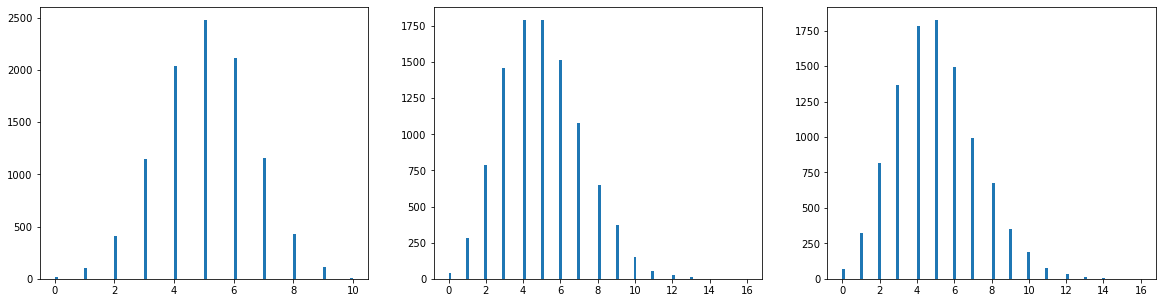

In [69]:
plt.figure(figsize=(20,5))
# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i],p[i],10000)
    plt.subplot(1,3,i+1)
    plt.hist(samples_binomial, 100)
    # Print results
    print(samples_binomial)
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

## Central Limit Theorem (CLT)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [71]:
# 1000 simulations of die roll
n = 20

# In each simulation, there is one trial more than the previous simulation
def clt(ntrials):
    avg = []
    for _ in range(10000):
        a = np.random.randint(1,7,ntrials).mean()
        avg.append(a)
    return avg

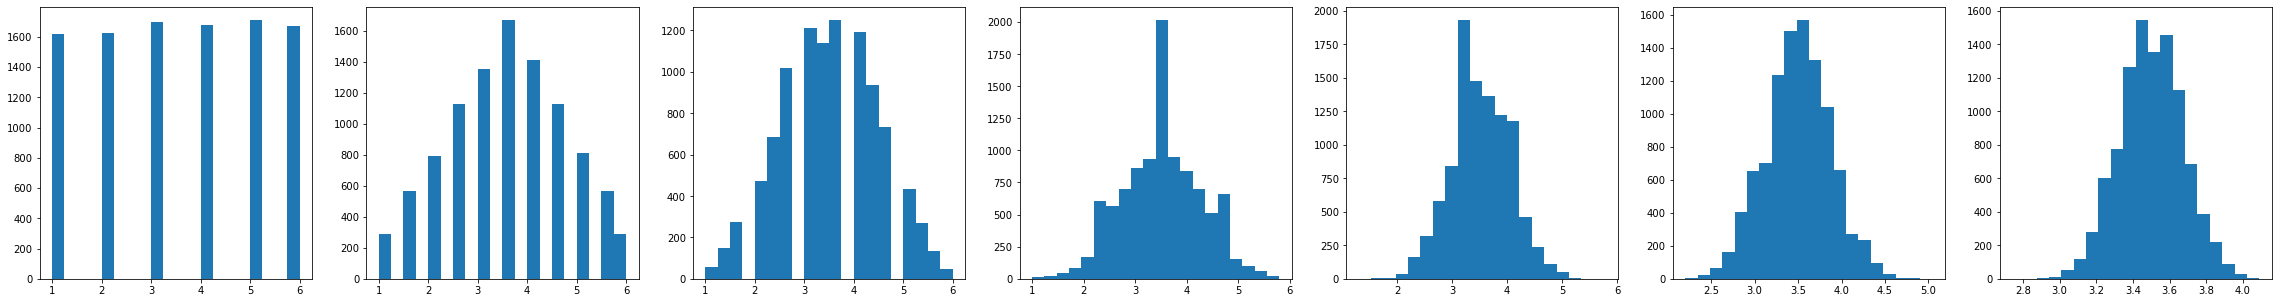

In [73]:
#ntrials_list = np.asarray(np.logspace(0, 4, 5, base=10),dtype=int)
ntrials_list = [1, 2, 3, 5, 10, 20, 100]
plt.figure(figsize=(40,5))
for k, num in enumerate(ntrials_list):    
    plt.subplot(1,len(ntrials_list),k+1)
    plt.hist(clt(num), bins=20)

## Monte Carlo Method: approximating π from random numbers

Create an array of random numbers and determine the fraction of points with distance from the origin smaller than one. Determine an approximation for π.

In [5]:
N = 10_000
inside = []
for _ in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2) < 1:
        inside.append((x, y))

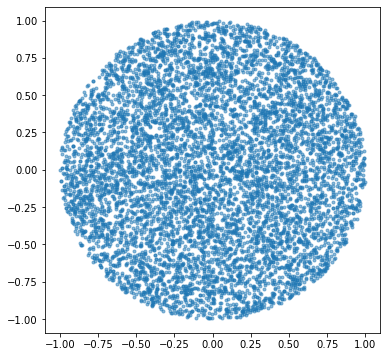

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter([xy[0] for xy in inside], [xy[1] for xy in inside], marker=".", alpha=0.5);

In [7]:
pi_estimated = 4 * len(inside)/float(N)
pi_estimated

3.1368

In [8]:
## Law of large numbers
## Estimate pi from Monte Carlo simuation with increasing number of N from 0 to 1000000
## Then, visualize the errors between the estimates and the real value of pi

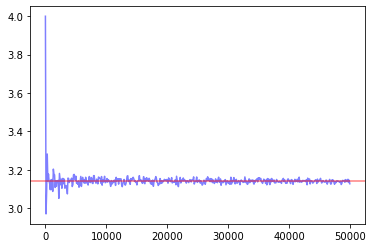

In [9]:
# range(1,50001,100)

pi_estimated = []

for i in range(1,50001,100):
    inside = []
    for _ in range(i):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if np.sqrt(x**2 + y**2) < 1:
            inside.append((x, y))
    v = 4 * len(inside)/float(i)
    pi_estimated.append(v)

    
plt.plot(range(1,50001,100), pi_estimated, color='b', alpha=0.5)
plt.axhline(np.pi, color="r", alpha=0.5);

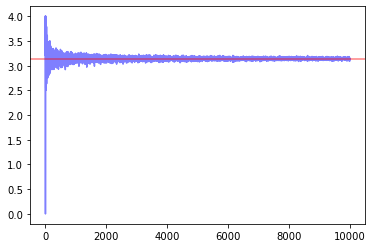

In [10]:
# range(10000)

approximation = []
N = 10000

for i in range(N):
    inside = []
    for _ in range(i+1):
        x = np.random.uniform(-1, 1)
        y = np.random.uniform(-1, 1)
        if np.sqrt(x**2 + y**2) < 1:
            inside.append((x, y))
    v = 4 * len(inside)/float(i+1)
    approximation.append(v)

    
plt.plot(range(10000), approximation, color='b', alpha=0.5)
plt.axhline(np.pi, color="r", alpha=0.5);

**Exercise**: let’s check that the error decreases proportionally to $\frac{1}{\sqrt{N}}$.

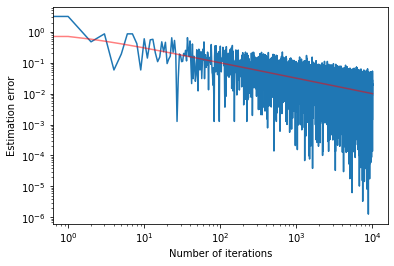

In [16]:
approximation = np.array(approximation)

plt.loglog(np.arange(N), np.abs(approximation-np.pi))
plt.loglog(1/np.sqrt(np.arange(N)+1), color="r", alpha=0.5)
plt.xlabel("Number of iterations")
plt.ylabel("Estimation error");

In [ ]:
## Increase number of points (npts) from 100 to 1e8 with logarithmic scale (100, 1000, 1e4,...1e8)
## Show that the approximate becomes more accurate with larger number of points
#pi_approx = np.zeros(7)
#npts_list = np.logspace(2, 8, 7, base=10)
#for i, npts in enumerate(npts_list):
#    pts = np.random.rand(2*int(npts)).reshape(2, -1)
#    pi_approx[i] = 4*np.count_nonzero(np.hypot(pts[0], pts[1]) < 1)/int(npts)

## Increase number of points (npts) from 100 to 1e8 with logarithmic scale (100, 1000, ##1e4,...1e8)
## Show that the approximate becomes more accurate with larger number of points
#pi_approx = np.zeros(7)
#npts_list = np.logspace(2, 8, 7, base=10)
#for i, npts in enumerate(npts_list):
#    pts = np.random.rand(2*int(npts)).reshape(2, -1)
#    pi_approx[i] = 4*np.count_nonzero(np.hypot(pts[0], pts[1]) < 1)/int(npts)


**Exercise**: use a similar Monte Carlo procedure in dimension 3 to estimate $\pi$ (your analysis will be based on the volume of a sphere of radius 1, instead of the area of a circle of radius 1). Recall that the volume of a sphere of radius $r$ is $\frac{4}{3}\pi r^3$.

In [12]:
N = 100000
inside = []
for _ in range(N):
    x = np.random.uniform(-1, 1)
    y = np.random.uniform(-1, 1)
    z = np.random.uniform(-1, 1)
    if np.sqrt(x**2 + y**2 + z**2) < 1:
        inside.append((x, y, z))

In [13]:
estimated_pi3 = 3/4 * 8 * len(inside)/float(N)

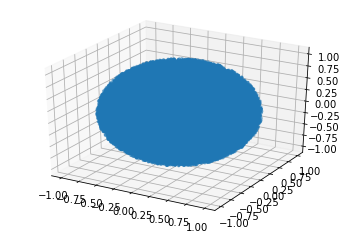

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter([i[0] for i in inside], [i[1] for i in inside], [i[2] for i in inside], 
           marker=".", alpha=0.5);

In [15]:
estimated_pi3

3.13842